# **ANNDA LAB 2:**

## **PART I:**

### **3.1**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import random

Training sets and test sets

In [ ]:
# train
patterns = np.arange(0, 2*np.pi, 0.1)
N = len(patterns)
y_sin = np.sin(2 * patterns)
y_square = np.sign(y_sin)
y_square[np.where(y_square == 0)[0]] = 1

# test
patterns_test = np.arange(0.5,2*np.pi,0.1)
N_test = len(patterns_test)
y_sin_test = np.sin(2 * patterns_test)
y_square_test = np.sign(y_sin_test)
y_square_test[np.where(y_square_test == 0)[0]] = 1


In [ ]:
def rbf_gaussian(x, mu, sigma, dim=1):
  if dim == 2:
    euclidian = (x[0]-mu[0])**2 + (x[1]-mu[1])**2
    return np.exp(-euclidian/2*sigma**2) 
  else:
    return np.exp((-(x-mu)**2)/2*sigma**2)

In [ ]:
def least_square_solution(number_RBF,target,target_test,sigma = 2*np.pi/N, threshold = False):
  phi = np.zeros((N,number_RBF))
  phi_test = np.zeros((N_test,number_RBF))
  for i in range(number_RBF):
    center = 2 * i * np.pi/number_RBF
    phi[:,i] = rbf_gaussian(patterns,center,sigma)
    phi_test[:,i] = rbf_gaussian(patterns_test,center,sigma)

  LMS_weights = np.linalg.solve((phi.T).dot(phi),(phi.T).dot(target))
  output = phi_test.dot(LMS_weights)
  if threshold:
    for j in range(len(output)):
      if output[j] >=0:
        output[j] = 1
      else:
        output[j] = -1
        
  absolute_residual_error = np.mean(abs(target_test - output))
  return output, LMS_weights, absolute_residual_error

In [ ]:
def adequate_hidden_node(target, target_test, error, sigma = 1, threshold = False):
  L = []
  number_RBF = 1
  while True:
    output, LMS_weights, absolute_residual_error = least_square_solution(number_RBF, target, target_test, 1, threshold)
    L.append(absolute_residual_error)
    if (absolute_residual_error < error):
      print(number_RBF," units are enough for a residual error less than " , error)
      return number_RBF, L, output
    number_RBF += 1

10  units are enough for a residual error less than  0.01


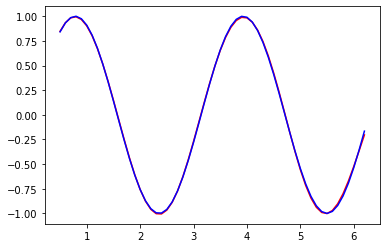

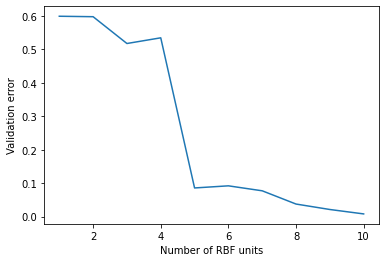

In [ ]:
number_RBF, L, output = adequate_hidden_node(y_sin, y_sin_test, 0.01)

plt.plot(patterns_test, output, color = "red")
plt.plot(patterns_test, y_sin_test, color = "blue")
plt.show()
plt.plot(range(1,number_RBF + 1),L)
plt.xlabel("Number of RBF units")
plt.ylabel("Validation error")
plt.show()

In [ ]:
import sys
epsilon = sys.float_info.epsilon

5  units are enough for a residual error less than  2.220446049250313e-16


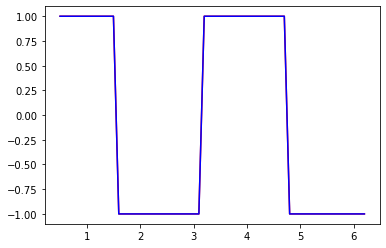

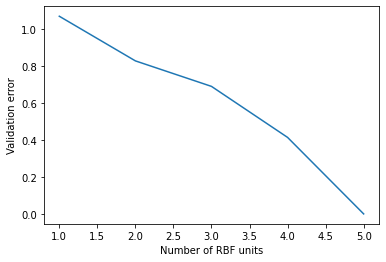

In [ ]:
number_RBF, L, output = adequate_hidden_node(y_square, y_square_test, error=epsilon, threshold=True)
plt.plot(patterns_test, output, color = "red")
plt.plot(patterns_test, y_square_test, color = "blue")
plt.show()

plt.plot(range(1,number_RBF + 1),L)
plt.xlabel("Number of RBF units")
plt.ylabel("Validation error")
plt.show()

### **3.2**

In [ ]:
# Adding noise to the data 
noise = np.random.normal(0, 0.1, N)
noise_test = np.random.normal(0, 0.1, N_test)

# add noise to patterns
patterns_noise = patterns+noise
patterns_test_noise = patterns_test + noise_test

In [ ]:
def hidden_layer(x, centers, sigma, N_RBF):
  hout = np.array([[norm(loc = 0, scale = sigma).pdf(np.linalg.norm(sample - centers[i])) for sample in x] for i in range(N_RBF)]).T
  return(hout)


# Delta rule algorihtm
def delta_rule(patterns, patterns_test, number_RBF, targets, targets_test,epochs,eta, sigma = 1, thershold = False, centers_mode='Random', nb_winners=1):
  # initialize weights and centers
  W = np.random.normal(0, 1, number_RBF)
  centers = rbf_centers(number_RBF, patterns, epochs=100, mode=centers_mode, nb_winners=nb_winners)
  # compute Phis
  phi = hidden_layer(patterns, centers, sigma, number_RBF)
  phi_test = hidden_layer(patterns_test, centers, sigma, number_RBF)
  # learning phase
  for i in range(epochs):
    index = np.arange(N)
    np.random.shuffle(index) 
    patterns = patterns[index]
    targets = targets[index]
    phi = phi[index]
    for j in range(len(patterns)):
      error = targets[j] - phi[j, :].dot(W)
      delta_w = eta*error*phi[j, :]
      W = W + delta_w
      
    
  output = phi_test.dot(W)
  if thershold:
    for j in range(len(output)):
      if (output[j] >= 0):
        output[j] = 1
      else:
        output[j] = -1
  absolute_residual_error = np.mean(abs(targets_test - output))
  return output, W, absolute_residual_error



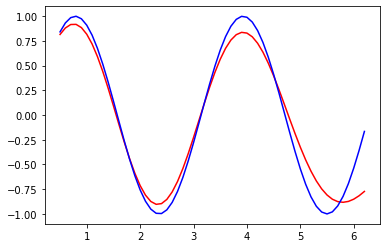

0.11684770880404476


In [ ]:
output, W, absolute_residual_error = delta_rule(patterns, patterns_test, 50, y_sin, y_sin_test, 1000,  0.01, 1, False, centers_mode='Trained')
plt.plot(patterns_test, output, color = "red")
plt.plot(patterns_test, y_sin_test, color = "blue")
plt.show()
print(absolute_residual_error)

IL RESTE DES TESTS A FAIRE MAIS HAMZA VA LE FAIRE

## **3.3**

### **Training centers**

In [ ]:
def rbf_centers(number_RBF, patterns, epochs=0, mode=None, nb_winners=1):
  if mode == 'Random':
     centers = np.random.rand(number_RBF)
  elif mode == 'Trained':
    # Initialize the centers
    centers = np.random.rand(number_RBF)

    for e in range(epochs):
      N = len(patterns)
      index = np.arange(N)
      np.random.shuffle(index) 
      patterns = patterns[index]

      for s in patterns:
        distances = [np.linalg.norm(s-c) for c in centers]
        winners_indexes = np.argsort(distances)[:nb_winners]
        # Update closest centers to the sample
        for winner in winners_indexes:
          centers[winner] = np.mean([centers[winner], s])
  else:
    centers = centers = [2 * i * np.pi/number_RBF for i in range(number_RBF)]
  return centers

In [ ]:
# Comparison of absolute residuals errors
are_random = []
are_cl = []
are_fixed = []
for k in range(2, 20):
  are_random.append(delta_rule(patterns, patterns_test, k, y_sin, 
                    y_sin_test, 1000, 0.01, 1, False, centers_mode='Random')[2])
  are_cl.append(delta_rule(patterns, patterns_test, k, y_sin, 
                    y_sin_test, 1000, 0.01, 1, False, centers_mode='Trained')[2]) 
  are_fixed.append(delta_rule(patterns, patterns_test, k, y_sin, 
                    y_sin_test, 1000, 0.01, 1, False, centers_mode='')[2]) 

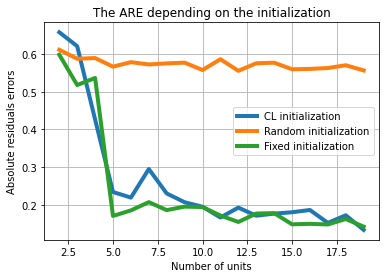

In [ ]:
# Vizualisation
plt.plot(range(2, 20), are_cl, label = "CL initialization", linewidth=4)
plt.plot(range(2, 20), are_random, label = "Random initialization", linewidth=4)
plt.plot(range(2, 20), are_fixed, label = "Fixed initialization", linewidth=4)
plt.legend(loc="best")
plt.xlabel("Number of units")
plt.ylabel("Absolute residuals errors")
plt.title("The ARE depending on the initialization")
plt.grid()

In [ ]:
# REPORT
# Without noise
runs = 10
errors_cl_1 = np.zeros(runs)
errors_cl_8 = np.zeros(runs)
errors_random = np.zeros(runs)
for i in range(runs):
  errors_cl_1[i] = delta_rule(patterns, patterns_test, 17, y_sin, 
                    y_sin_test, 1000, 0.01, 1, False, centers_mode='Trained')[2]
  errors_cl_8[i] = delta_rule(patterns, patterns_test, 17, y_sin, 
                    y_sin_test, 1000, 0.01, 1, False, centers_mode='Trained', nb_winners=8)[2]                    
  errors_random[i] = delta_rule(patterns, patterns_test, 17, y_sin, 
                    y_sin_test, 1000, 0.01, 1, False, centers_mode='Random')[2]    

error_cl_1, std_cl_1 =  np.mean(errors_cl_1), np.std(errors_cl_1)
error_cl_8, std_cl_8 = np.mean(errors_cl_8), np.std(errors_cl_8)
error_random, std_random = np.mean(errors_random), np.std(errors_random)                         


In [ ]:
print(error_cl_1, std_cl_1)
print(error_cl_8, std_cl_8)
print(error_random, std_random)

0.16449502281076933 0.015039825192201733
0.3785014069635417 0.119415524026798
0.5646112340719502 0.006575733451713328


In [ ]:
# With noise
runs = 10
errors_cl_1 = np.zeros(runs)
errors_cl_8 = np.zeros(runs)
errors_random = np.zeros(runs)
for i in range(runs):
  errors_cl_1[i] = delta_rule(patterns_noise, patterns_test_noise, 17, y_sin, 
                    y_sin_test, 1000, 0.01, 1, False, centers_mode='Trained')[2]
  errors_cl_8[i] = delta_rule(patterns_noise, patterns_test_noise, 17, y_sin, 
                    y_sin_test, 1000, 0.01, 1, False, centers_mode='Trained', nb_winners=8)[2]                    
  errors_random[i] = delta_rule(patterns_noise, patterns_test_noise, 17, y_sin, 
                    y_sin_test, 1000, 0.01, 1, False, centers_mode='Random')[2]    

error_cl_1, std_cl_1 =  np.mean(errors_cl_1), np.std(errors_cl_1)
error_cl_8, std_cl_8 = np.mean(errors_cl_8), np.std(errors_cl_8)
error_random, std_random = np.mean(errors_random), np.std(errors_random)    

In [ ]:
print(error_cl_1, std_cl_1)
print(error_cl_8, std_cl_8)
print(error_random, std_random)

0.1826408084036904 0.02014048650321217
0.4320340314390755 0.11900659760064435
0.5618244675154196 0.005698671771368237


In [ ]:
# Without noise
runs = 10
errors = np.zeros(runs)
for i in range(runs):
  errors[i] = delta_rule(patterns_noise, patterns_test_noise, 17, y_sin, 
                    y_sin_test, 1000, 0.01, 1, False, centers_mode='Trained', nb_winners=4)[2]  

error, std = np.mean(errors), np.std(errors) 
print(error, std)  

0.2316513451527989 0.030369638588819164


Comparison of vanilla CL vs new CL

In [ ]:
# Gave minimum error in previous test
number_RBF = 17
are_errors = []

for nbwin in range(1, number_RBF-1):
  are_errors.append(delta_rule(patterns, patterns_test, 16, y_sin, 
                    y_sin_test, 1000, 0.01, 1, False, centers_mode='Training', nb_winners=nbwin)[2])


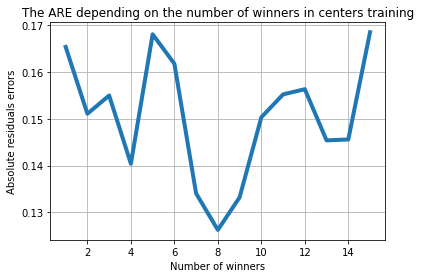

In [ ]:
# Vizualisation
plt.plot(range(1, number_RBF-1), are_errors, linewidth=4)
plt.xlabel("Number of winners")
plt.ylabel("Absolute residuals errors")
plt.title("The ARE depending on the number of winners in centers training")
plt.grid()

### **2D Function approximation**

In [ ]:
def mean_squared_error(X, y, W, phi, dim=1):
  y_pred = np.zeros((dim, X.shape[1]))  
  y_pred[0] = phi.dot(W[0])
  y_pred[1] = phi.dot(W[1])
  return (1 / 2) * np.mean((y[0] - y_pred[0])**2 + (y[1] - y_pred[1])**2)

In [ ]:
data_train = np.genfromtxt(f'ballist.dat').T
data_test = np.genfromtxt(f'balltest.dat').T

X_train_2D, y_train_2D = data_train[:2, :], data_train[2:, :]
X_test_2D, y_test_2D = data_test[:2, :], data_test[2:, :]

In [ ]:
# With trained centers
output_CL, W_CL, are_CL, centers_CL, mse_training, mse_test = delta_rule(X_train_2D, X_test_2D, 50, y_train_2D, 
                                            y_test_2D, 1000,  0.01, 1, False, centers_mode='Trained', dim=2)

In [ ]:
# Comparison of absolute residuals errors
mse_random_training = []
mse_random_test = []
mse_cl_training = []
mse_cl_test = []
range_units = range(2,100)

for k in range_units:
  _,_,_,_,mse_training,mse_test = delta_rule(X_train_2D, X_test_2D, k, y_train_2D, 
                    y_test_2D, 1000,  0.01, 1, False, centers_mode='Random', dim=2)
  mse_random_training.append(mse_training)
  mse_random_test.append(mse_test)
  _,_,_,_,mse_training_cl,mse_test_cl = delta_rule(X_train_2D, X_test_2D, k, y_train_2D, 
                y_test_2D, 1000,  0.01, 1, False, centers_mode='Trained', dim=2)
  mse_cl_training.append(mse_training_cl)
  mse_cl_test.append(mse_test_cl)


In [ ]:
print(mse_cl_test)
print(mse_cl_training)

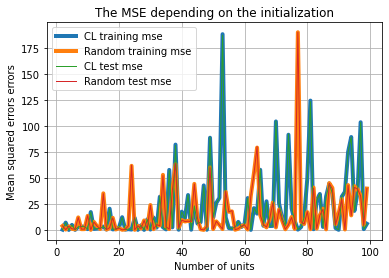

In [ ]:
# Vizualisation
plt.plot(range_units, mse_cl_training, label = "CL training mse", linewidth=4)
plt.plot(range_units, mse_random_training, label = "Random training mse", linewidth=4)
plt.plot(range_units, mse_cl_test, label = "CL test mse", linewidth=1)
plt.plot(range_units, mse_random_test, label = "Random test mse", linewidth=1)

plt.legend(loc="best")
plt.xlabel("Number of units")
plt.ylabel("Mean squared errors errors")
plt.title("The MSE depending on the initialization")
plt.grid()

In [ ]:
output_CL, W_CL, are_CL, centers_CL, mse_training, mse_test = delta_rule(X_train_2D, X_test_2D, 10, y_train_2D, 
                                            y_test_2D, 1000,  0.01, 1, False, centers_mode='Trained', dim=2)

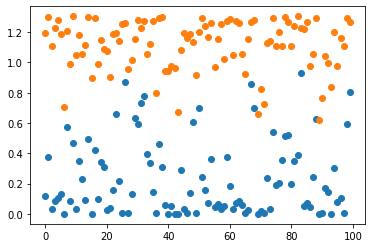

In [ ]:
# plt.scatter(y_test_2D[0], y_test_2D[1])
# plt.scatter(output_CL[0], output_CL[1])

plt.scatter(range(len(y_test_2D[0])), y_test_2D[0])
plt.scatter(range(len(y_test_2D[0])), output_CL[0])

## **REGRESSION LEAST SQUARE 2D**

In [ ]:
C = np.array([[255, 0, 0], [0, 255, 0], [0, 0, 255], [25, 50, 36], [65, 255, 54], [99, 26, 255]])

In [ ]:
def rbf_centers_2(number_RBF, patterns, epochs=0, mode=None):
  if mode == 'Random':
     centers = np.random.rand(number_RBF, patterns.shape[0])
  elif mode == 'Trained':
    # Initialize the centers
    centers = np.random.rand(number_RBF, patterns.shape[0])

    for e in range(epochs):
      index = np.arange(patterns.shape[1])
      np.random.shuffle(index) 
      for i in range(patterns.shape[0]):
        patterns[i] = patterns[i][index]
      # for index in range(patterns.shape[1]):
      distances = [np.linalg.norm(patterns[:, 0]-c) for c in centers]
        # Here we choose the numbers of neighbors, here the 2 closest are the winners
      winners_indexes = np.argsort(distances)[:1]
        # Update closest centers to the sample
      for winner in winners_indexes:
        centers[winner, 0] = np.mean([centers[winner, 0], patterns[0, 0]])
        centers[winner, 1] = np.mean([centers[winner, 1], patterns[1, 0]])
      fig, ax = plt.subplots()
      ax.scatter(X_train_2D[0], X_train_2D[1],label="Inputs")
      ax.scatter(centers[:,0], centers[:,1],label="RBF centers", c = ["green", "brown", "red", "orange", "black", "pink"])
      ax.set_xlabel('Angle')
      ax.set_ylabel('Velocity')
      # plt.legend(loc="best")
      plt.savefig(f"images/{e}.png", dpi=100)
      plt.show()
  else:
    centers = [2 * i * np.pi/number_RBF for i in range(number_RBF)]
  return centers

In [ ]:
def rbf_gaussian_2(x, mu, sigma, dim=1):
  if dim == 2:
    euclidian = (x[0]-mu[0])**2 + (x[1]-mu[1])**2
    return np.exp(-euclidian/2*sigma**2) 
  else:
    return np.exp((-(x-mu)**2)/2*sigma**2)

In [ ]:
def least_square_solution_2(number_RBF, x_train, x_test, y_train, y_test, sigma = 1):
  N = len(x_train[0])
  N_test = len(x_test[0])
  phi = np.zeros((N,number_RBF))
  phi_test = np.zeros((N_test,number_RBF))
  centers = rbf_centers_2(number_RBF, x_train, epochs=1000, mode='Trained')
  for i in range(number_RBF):
    phi[:,i] = rbf_gaussian_2(x_train, centers[i], sigma, dim=2)
    phi_test[:,i] = rbf_gaussian_2(x_test, centers[i], sigma, dim=2)

  W = np.zeros((2, number_RBF))
  W[0] = np.linalg.solve((phi.T).dot(phi),(phi.T).dot(y_train[0]))
  W[1] = np.linalg.solve((phi.T).dot(phi),(phi.T).dot(y_train[1]))

  output = np.zeros((y_test.shape[0], y_test.shape[1]))
  output[0] = phi_test.dot(W[0])
  output[1] = phi_test.dot(W[1])

  # mse = (1 / 2) * np.mean((y_test[0] - output[0])**2 + (y_test[1] - output[1])**2)
  mse_dist = (1 / 2) * np.mean((y_test[0] - output[0])**2)
  mse_height = (1 / 2) * np.mean((y_test[1] - output[1])**2)

        
  return output, W, mse_dist, mse_height 



In [ ]:
y_pred, W, mse_dist, mse_height = least_square_solution_2(16, X_train_2D, X_test_2D, y_train_2D, y_test_2D, sigma = 1)

NameError: ignored

In [ ]:
print(mse_dist)

In [ ]:
print(mse_height)

In [ ]:
mse_height = []
mse_dist = []
for k in range(3, 20):
  _,_,mse_d, mse_h = least_square_solution_2(k, X_train_2D, X_test_2D, y_train_2D, y_test_2D, sigma = 1)
  mse_height.append(mse_h)
  mse_dist.append(mse_d)
 

In [ ]:
mse_dist

In [ ]:
plt.plot(range(3, 20), mse_height, label = "Height mse", linewidth=4)
plt.plot(range(3, 20), mse_dist, label = "Distance mse", linewidth=4)
plt.legend(loc="best")
plt.xlabel("Number of units")
plt.ylabel("Mean squared errors errors")
plt.title("The MSE of Height and Distance predictions")
plt.grid()

In [ ]:
centers = rbf_centers_2(6, X_train_2D, epochs=100, mode='Trained')

In [ ]:
fig, ax = plt.subplots()
ax.scatter(X_train_2D[0], X_train_2D[1],label="Inputs")
ax.scatter(centers[:,0], centers[:,1],label="RBF centers")
ax.set_xlabel('Angle')
ax.set_ylabel('Velocity')
# plt.legend(loc="best")
plt.show()

In [ ]:
ax = plt.axes(projection='3d')
ax.scatter(X_test_2D[0], X_test_2D[1], y_test_2D[0], label="Targets")
ax.scatter(X_test_2D[0], X_test_2D[1], y_pred[0], label="Predictions")
ax.set_xlabel('Angle')
ax.set_ylabel('Velocity')
ax.set_zlabel('Distance')
plt.legend(loc="upper left")
plt.show()

In [ ]:
ax = plt.axes(projection='3d')
ax.scatter(X_test_2D[0], X_test_2D[1], y_test_2D[1], label="Targets")
ax.scatter(X_test_2D[0], X_test_2D[1], y_pred[1], label="Predictions")
ax.set_xlabel('Angle')
ax.set_ylabel('Velocity')
ax.set_zlabel('Height')
plt.legend(loc="upper left")
plt.show()

In [ ]:
import numpy as np


# data = np.genfromtxt(f'{data_dir}/animals.dat', delimiter=',')
data = np.genfromtxt('animals.dat', delimiter=',')
# labels = np.genfromtxt(f'{data_dir}/animalnames.txt', dtype=str)
labels = np.genfromtxt('animalnames.txt', dtype=str)
labels = np.array([label[1: -1] for label in labels])
X_animals = data.reshape(32, 84)

def init_weights(shape):
  if len(shape) == 1:
    W = np.random.normal(0, 1, shape)
  else:
    W = np.random.normal(0, 1, np.prod(shape)).reshape(shape)
  return W


def SOM(X, lr=0.2, n_output=100, n_epoch=20, neigh_start=50, neigh_speed=1.2, circular=False):
  W = init_weights([n_output, X.shape[1]])
  for epoch in range(n_epoch):
    neigh = max(int(neigh_start * (1 - neigh_speed * epoch / n_epoch)), 0)
    # print(neigh)
    for x in X:
      distances = [np.linalg.norm(x - w) for w in W]
      ind_winner = np.argmin(distances)
      # Weights update
      args = np.arange(max(0, ind_winner - neigh), min(W.shape[0], ind_winner + neigh + 1))
      if circular:
        args = args % n_output
      W[args] = W[args] + lr * (x - W[args])
  return W


W_animals = SOM(X_animals)
pos = []
print(len(W_animals))

for x in X_animals:
  distances = [np.linalg.norm(x - w) for w in W_animals]
  ind_winner = np.argmin(distances)
  pos += [ind_winner]
pos = np.argsort(pos)

print(f'Animals sorted by similarities:\n{labels[pos]}') 
print(np.sort(pos))